# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. The full details for these papers can be found the course guide. Rozenberg et al and Hamarat et al are optional readings for this week. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in columns 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [50]:
import pandas as pd

df = pd.read_csv('data/Bryant et al 2010.csv')
df.head()

,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0


In [51]:
# Define experiments and outcomes
x = df.iloc[:,2:11]
y = df.iloc[:,15] # These are integer-binary and simply greater than 90%

x.head()

,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price
0,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997
1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003
2,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003
3,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003
4,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000


In [47]:
# This doesn't actually seem necessary anymore
# # Convert to numpy format, since workbench is not entirely compatible with pandas
# x = x.to_records()
# y = y.values

## PRIM Analysis

In [48]:
from ema_workbench.analysis import prim # Throws error
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [54]:
prim_alg = prim.Prim(x, y, threshold = 0.8, peel_alpha = 0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


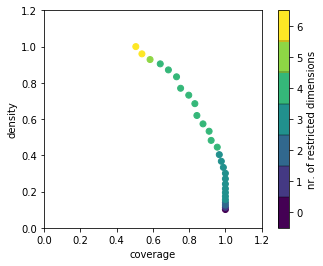

In [58]:
import matplotlib.pyplot as plt

box1.show_tradeoff()
plt.show()

coverage     0.752809
density      0.770115
id                 21
mass        0.0986395
mean         0.770115
res_dim             4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  755.799988   [-1.0, 4.716968553178765e-06]
Demand elasticity        -0.422000   -0.202000  [1.1849299115762218e-16, -1.0]
Biomass backstop price  150.049995  199.600006   [3.515112530263049e-11, -1.0]
Cellulosic cost          72.650002  133.699997     [0.15741333528927348, -1.0]



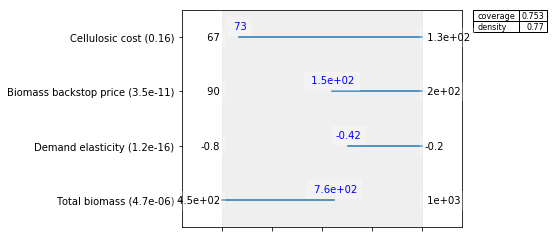

In [63]:
box1.inspect(21)
box1.inspect(21, style = 'graph')
plt.show()

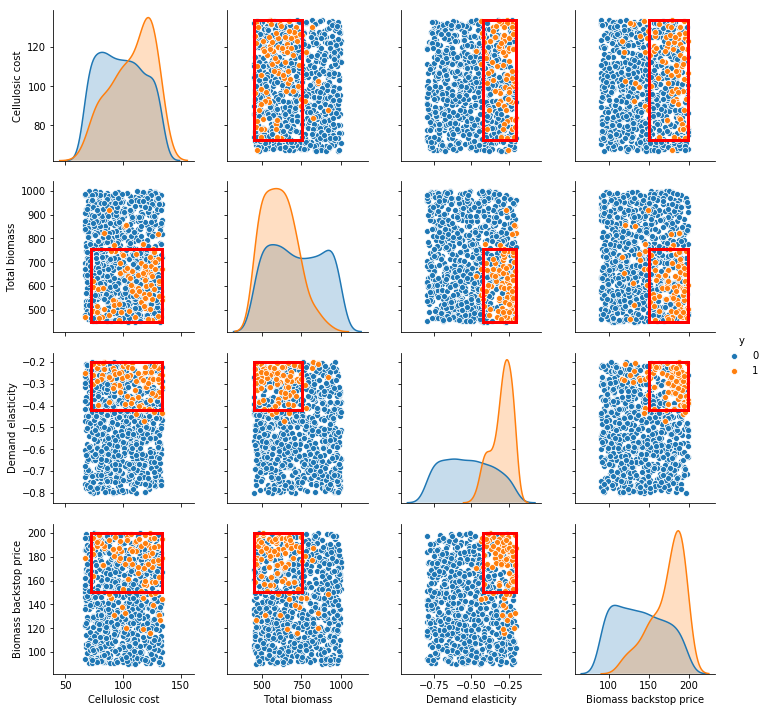

In [65]:
box1.select(21)
fig = box1.show_pairs_scatter()
plt.show()

In [66]:
box2 = prim_alg.find_box()

[MainProcess/INFO] 795 points remaining, containing 22 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.3469387755102041, returning dump box


No additional boxes can be found where it fits over 0.8 of the points.

In [70]:
print(prim_alg.stats_to_dataframe())
print(prim_alg.boxes_to_dataframe())

       coverage   density      mass  res_dim
box 1  0.752809  0.770115  0.098639        4
box 2  0.247191  0.027673  0.901361        0
                             box 1              box 2            
                               min         max    min         max
Demand elasticity        -0.422000   -0.202000   -0.8   -0.202000
Biomass backstop price  150.049995  199.600006   90.0  199.600006
Total biomass           450.000000  755.799988  450.0  997.799988
Cellulosic cost          72.650002  133.699997   67.0  133.699997


## CART Analysis

In [72]:
from ema_workbench.analysis import cart
cart_alg = cart.CART(x, y, 0.05)
cart_alg.build_tree()

In [74]:
print(cart_alg.stats_to_dataframe())
print(cart_alg.boxes_to_dataframe())

       coverage   density      mass  res dim
box 1  0.011236  0.021739  0.052154        2
box 2  0.000000  0.000000  0.546485        2
box 3  0.000000  0.000000  0.103175        2
box 4  0.044944  0.090909  0.049887        2
box 5  0.224719  0.434783  0.052154        2
box 6  0.112360  0.227273  0.049887        3
box 7  0.000000  0.000000  0.051020        3
box 8  0.606742  0.642857  0.095238        2
                       box 1                  box 2               box 3  \
                         min         max        min         max     min   
Cellulosic yield        80.0   81.649998  81.649998   99.900002  80.000   
Demand elasticity       -0.8   -0.439000  -0.800000   -0.439000  -0.439   
Biomass backstop price  90.0  199.600006  90.000000  199.600006  90.000   

                                         box 4                box 5  \
                               max         min         max      min   
Cellulosic yield         99.900002   80.000000   99.900002   80.000   
Demand

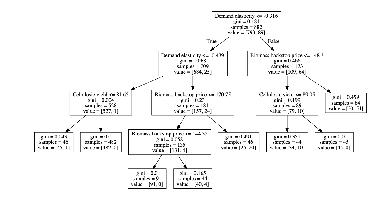

In [91]:
cart_alg.show_tree(True, format = 'png')
plt.show()
# Is there any way to change the resolution on this?

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?
